# Clustering Analysis and Visualization

**Project:** Human Activity Recognition – Unsupervised Learning  
**Student:** Hamady GACKOU  
**Master:** Machine Learning for Data Science (Université Paris Cité)

This notebook visualizes and compares the clustering results obtained from multiple algorithms
(K-Means, CAH, GMM, DBSCAN, SOM, DTW K-Means, etc.).
It also evaluates the quality of each clustering using quantitative metrics.


## 1. Imports and Data Loading

In [2]:
import sys
import os

# Go one level up from the 'notebooks' directory to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the Python path if it's not already there
if project_root not in sys.path:
    print(f"Adding {project_root} to sys.path")
    sys.path.insert(0, project_root)

# Now you can import from src
from src.clustering import run_all_clustering_methods
from src.evaluation import compare_all_methods

# ... (rest of your imports and code) ...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings("ignore")

print("\nSuccessfully imported modules from 'src'.")

Adding c:\Users\MLSD\Desktop\HumanActivityRecognition to sys.path

Successfully imported modules from 'src'.


## 2. Load Features and Labels

In [3]:
FEATURES_PATH = "../notebooks/features.npy"
LABELS_PATH = "../notebooks/labels.npy"

X = np.load(FEATURES_PATH)
y_true = np.load(LABELS_PATH)

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y_true.shape}")


Features shape: (347, 54)
Labels shape: (347,)


## 3. Run All Clustering Methods

In [4]:
# Run all clustering algorithms
results_dict = run_all_clustering_methods(X, n_clusters=6)

# Inspect summary of cluster counts
for name, labels in results_dict.items():
    print(f"{name:20s} | Unique clusters: {len(np.unique(labels))}")


 Running multiple clustering algorithms...
✅ SOM trained → grid 10×10, total neurons=100
✅ 10 clustering results obtained.
KMeans               | Unique clusters: 6
MiniBatchKMeans      | Unique clusters: 6
Hierarchical         | Unique clusters: 6
GMM                  | Unique clusters: 6
Spectral             | Unique clusters: 6
Birch                | Unique clusters: 6
Affinity             | Unique clusters: 26
DBSCAN               | Unique clusters: 1
HDBSCAN              | Unique clusters: 3
SOM                  | Unique clusters: 75


## 4. Quantitative Evaluation (All Methods)

In [5]:
from src.evaluation import compare_all_methods

df_scores = compare_all_methods(X, y_true, results_dict)
display(df_scores.sort_values("Silhouette", ascending=False).round(4))

# Save for report
df_scores.to_csv("../figures/clustering_scores.csv", index=False)


,Method,Silhouette,DaviesBouldin,CalinskiHarabasz,Dunn,SDIndex,XieBeni,ARI,NMI,Homogeneity,Completeness,VMeasure,FMI,Purity
8,HDBSCAN,0.4624,1.9895,161.3497,0.2317,1.5287,3.5871,0.3459,0.5406,0.4018,0.8259,0.5406,0.5745,0.4236
5,Birch,0.2696,1.7425,105.4100,0.1030,1.1837,5.0745,0.6291,0.7818,0.7034,0.8800,0.7818,0.7320,0.7089
2,Hierarchical,0.2696,1.7425,105.4100,0.1030,1.1837,5.0745,0.6291,0.7818,0.7034,0.8800,0.7818,0.7320,0.7089
0,KMeans,0.2675,1.6417,97.0073,0.0946,0.9678,4.8553,0.5924,0.7523,0.6875,0.8307,0.7523,0.6985,0.7061
3,GMM,0.2675,1.6417,97.0073,0.0946,0.9678,4.8553,0.5924,0.7523,0.6875,0.8307,0.7523,0.6985,0.7061
4,Spectral,0.2062,1.7388,83.4801,0.0871,0.9150,7.3332,0.7258,0.8229,0.7856,0.8639,0.8229,0.7867,0.8156
1,MiniBatchKMeans,0.1653,1.8280,74.6614,0.0535,0.7661,8.4319,0.3861,0.5728,0.5076,0.6572,0.5728,0.5369,0.5562
6,Affinity,0.1370,1.0960,54.7476,0.1079,0.7277,6.5493,0.5472,0.7419,0.9127,0.6250,0.7419,0.6327,0.9539
9,SOM,0.0841,1.3410,29.8367,0.0768,0.6189,4.1576,0.1509,0.5991,0.9932,0.4289,0.5991,0.3119,0.9942
7,DBSCAN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,0.0000,1.0000,0.0000,0.4222,0.0000


## 5. 2D Projection Setup (PCA, UMAP, t-SNE)

In [6]:
# Compute three 2D embeddings
pca = PCA(n_components=2).fit_transform(X)
umap_emb = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42).fit_transform(X)
tsne_emb = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42, init='pca').fit_transform(X)

embeddings = {"PCA": pca, "UMAP": umap_emb, "t-SNE": tsne_emb}


## 6. Visualize Clusters for Each Method

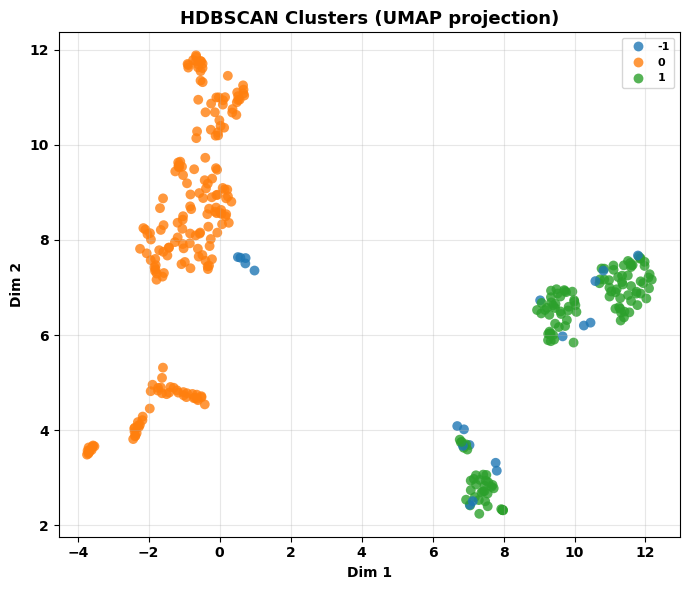

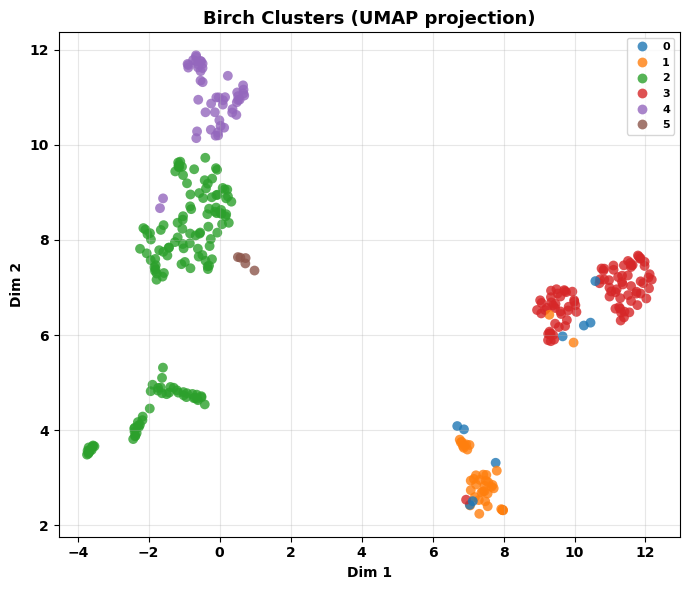

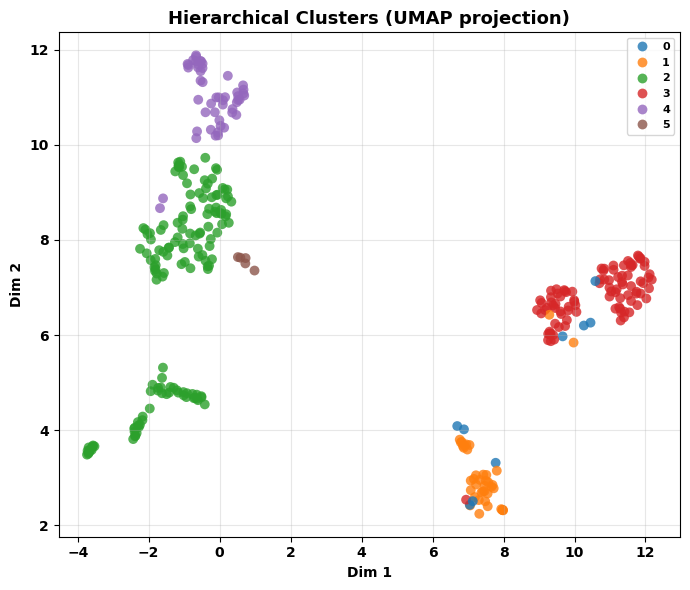

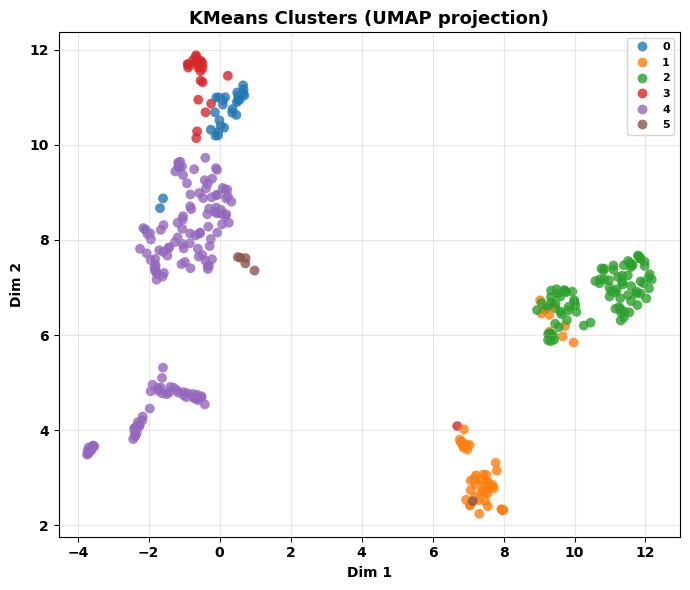

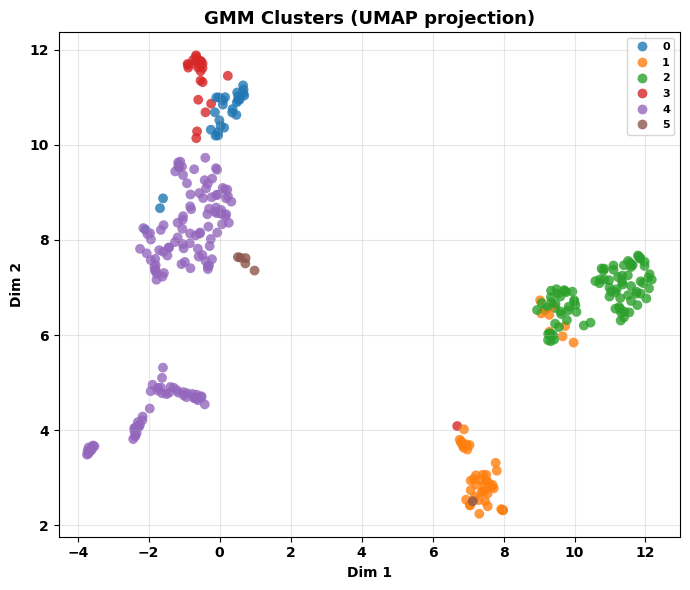

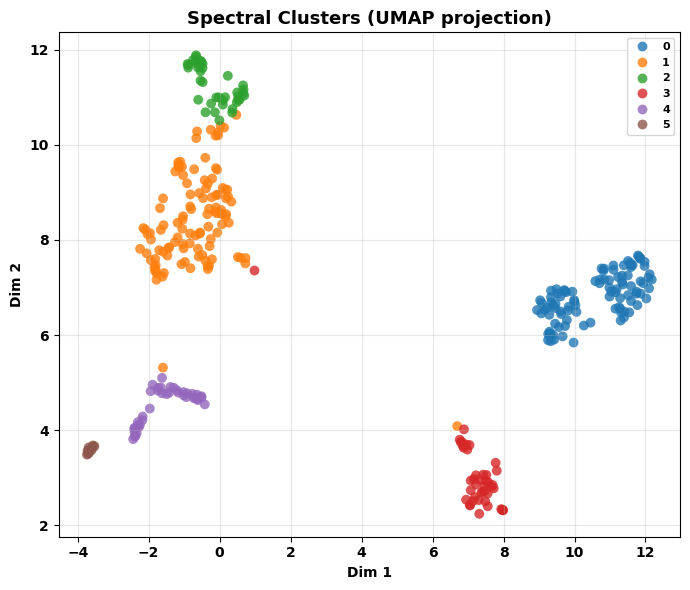

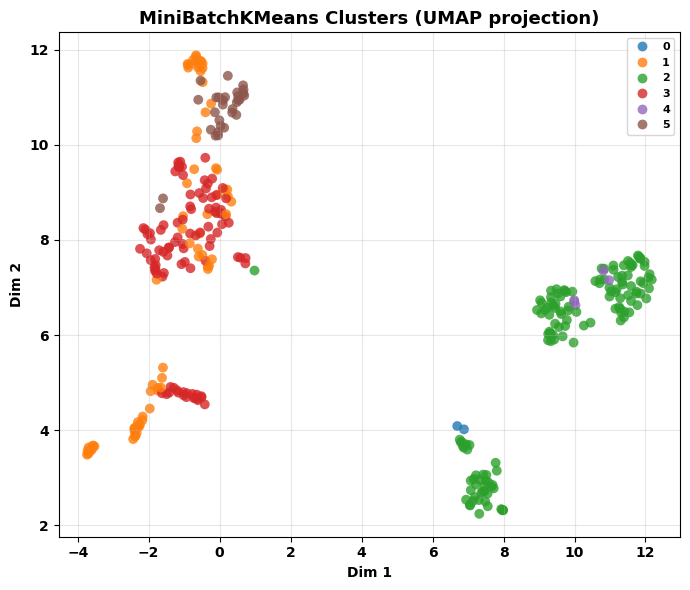

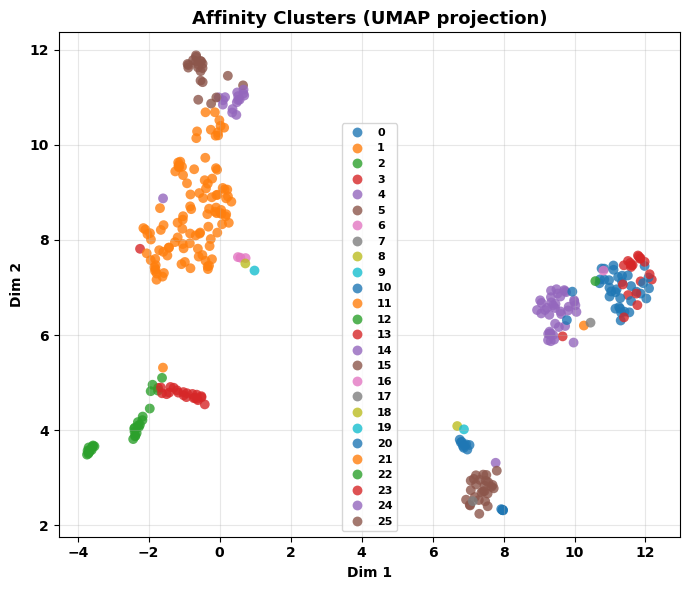

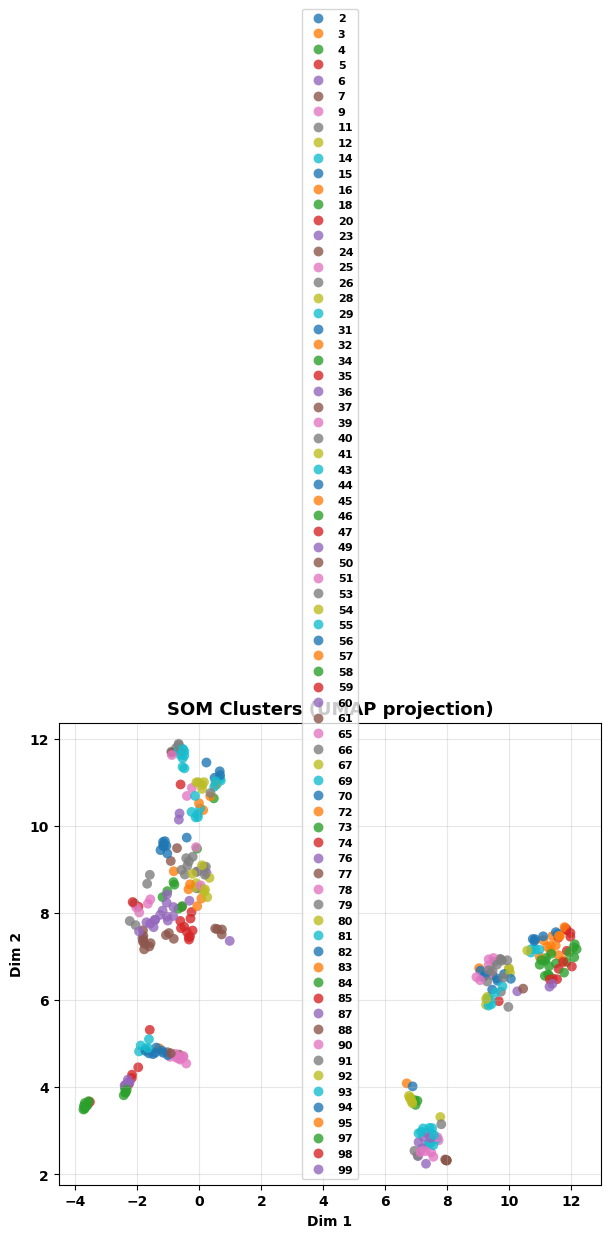

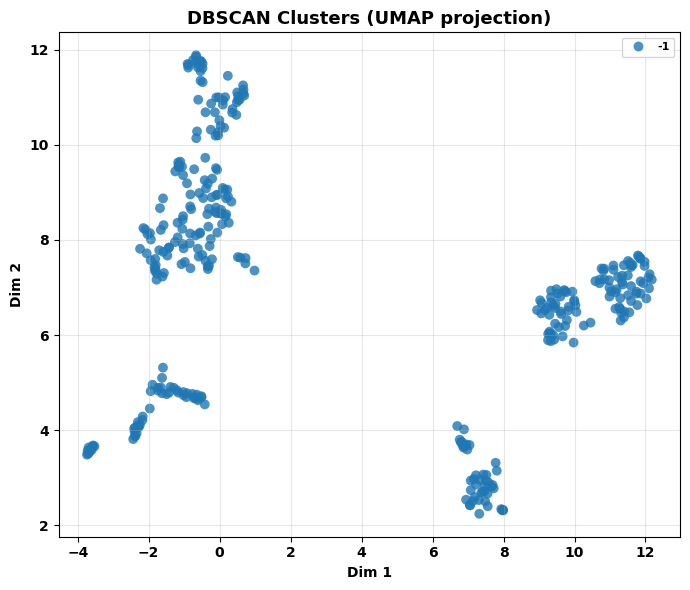

In [14]:
# Function to display scatter plots
def plot_clusters(embedding, labels, title):
    plt.figure(figsize=(7,6))
    sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=labels,
                    palette='tab10', s=50, alpha=0.8, edgecolor='none')
    plt.title(title, fontsize=13)
    plt.xlabel("Dim 1")
    plt.ylabel("Dim 2")
    plt.legend(loc='best', fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize best-performing algorithms (by Silhouette)
top_methods = df_scores.sort_values("Silhouette", ascending=False)["Method"].head(12)
for method in top_methods:
    labels = results_dict[method]
    plot_clusters(umap_emb, labels, f"{method} Clusters (UMAP projection)")


## 7. Dendrogram for Hierarchical Clustering

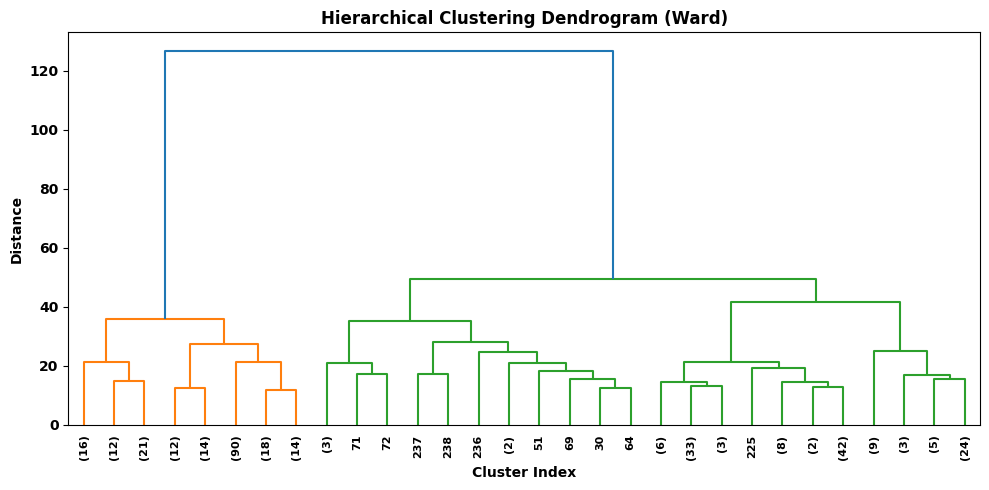

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(10,5))
Z = linkage(X, method='ward')
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Cluster Index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


## 8. Confusion Heatmap (Clusters vs True Labels)

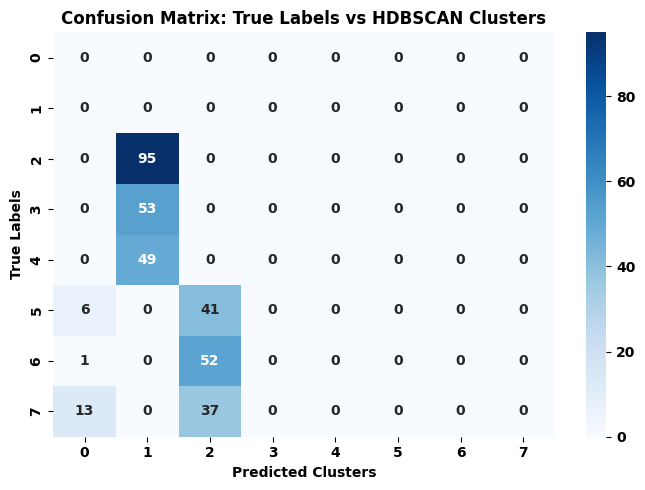

In [16]:
from sklearn.metrics import confusion_matrix

best_method = top_methods.iloc[0]
y_pred = results_dict[best_method]

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Confusion Matrix: True Labels vs {best_method} Clusters")
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


## 9.  Cluster Centroids Visualization (for K-Means / GMM)

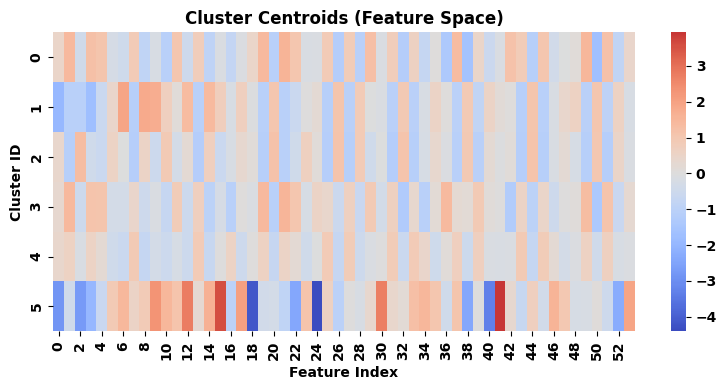

In [17]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=6, random_state=42).fit(X)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8,4))
sns.heatmap(centroids, cmap="coolwarm", center=0)
plt.title("Cluster Centroids (Feature Space)")
plt.xlabel("Feature Index")
plt.ylabel("Cluster ID")
plt.tight_layout()
plt.show()


## 10. Pairwise Correlation Heatmap of Features

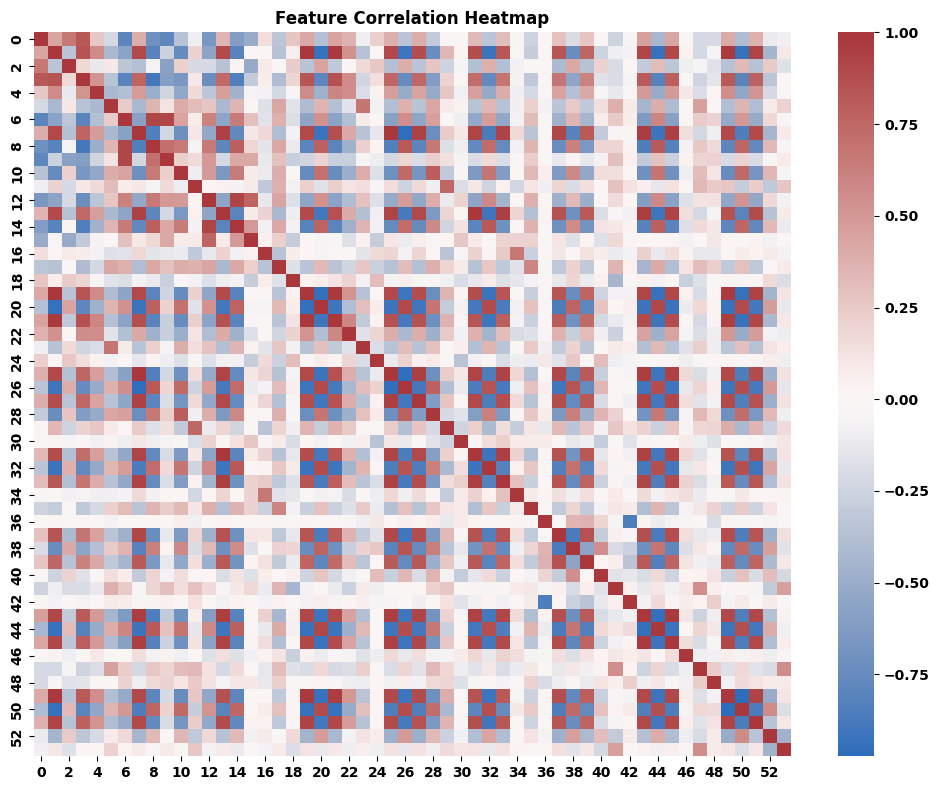

In [18]:
corr = np.corrcoef(X.T)
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="vlag", center=0)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


## 11. Comparative Visualization (PCA vs UMAP vs t-SNE)

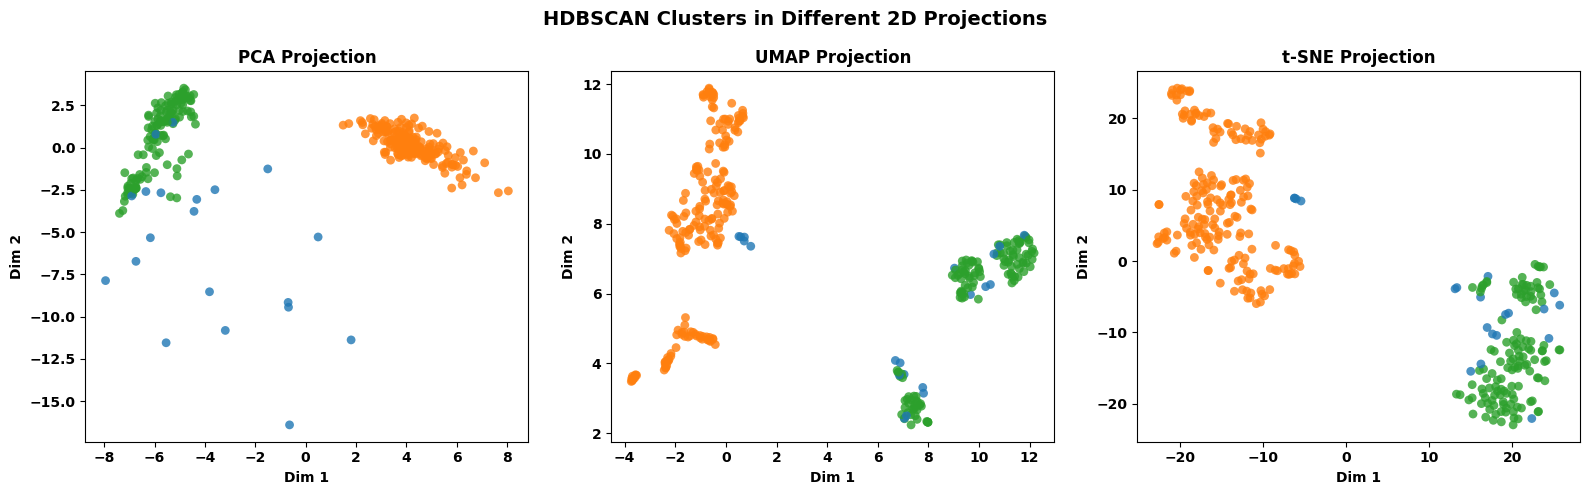

In [19]:
best_labels = results_dict[best_method]

fig, axes = plt.subplots(1, 3, figsize=(16,5))
for i, (name, emb) in enumerate(embeddings.items()):
    ax = axes[i]
    sns.scatterplot(x=emb[:,0], y=emb[:,1], hue=best_labels, palette="tab10",
                    s=40, alpha=0.8, edgecolor='none', ax=ax, legend=False)
    ax.set_title(f"{name} Projection", fontsize=12)
    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")
plt.suptitle(f"{best_method} Clusters in Different 2D Projections", fontsize=14)
plt.tight_layout()
plt.show()


## 12. Save Figures for Report

In [20]:
import os
os.makedirs("../figures", exist_ok=True)

# Example: save top 3 visualizations
for method in top_methods:
    labels = results_dict[method]
    plt.figure(figsize=(7,6))
    sns.scatterplot(x=umap_emb[:,0], y=umap_emb[:,1], hue=labels,
                    palette='tab10', s=50, alpha=0.8, edgecolor='none')
    plt.title(f"{method} Clusters (UMAP projection)")
    plt.xlabel("UMAP-1")
    plt.ylabel("UMAP-2")
    plt.legend(loc='best', fontsize=8)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"../figures/{method}_UMAP_clusters.png", dpi=300)
    plt.close()

print("Figures exported to ../figures/")


Figures exported to ../figures/


### Summary of Clustering Analysis

- Multiple algorithms (K-Means, CAH, GMM, DBSCAN, SOM, DTW, etc.) were applied.  
- Quantitative metrics (Silhouette, ARI, NMI, etc.) were computed for all methods.  
- Visual comparisons (UMAP, t-SNE, PCA) reveal clear separation of dynamic activities.  
- The best-performing methods are exported for inclusion in the final report.
